In [ ]:
%matplotlib inline


# L1 Penalty and Sparsity in Logistic Regression


Comparison of the sparsity (percentage of zero coefficients) of solutions when
L1 and L2 penalty are used for different values of C. We can see that large
values of C give more freedom to the model.  Conversely, smaller values of C
constrain the model more. In the L1 penalty case, this leads to sparser
solutions.

We classify 8x8 images of digits into two classes: 0-4 against 5-9.
The visualization shows coefficients of the models for varying C.



In [2]:
print(__doc__)

# Authors: Alexandre Gramfort <alexandre.gramfort@inria.fr>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Andreas Mueller <amueller@ais.uni-bonn.de>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

digits = datasets.load_digits()

X, y = digits.data, digits.target
X = StandardScaler().fit_transform(X)
X

Automatically created module for IPython interactive environment


array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [3]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [4]:
# classify small against large digits
y = (y > 4).astype(np.int)
y

array([0, 0, 0, ..., 1, 1, 1])

C=1.00
Sparsity with L1 penalty: 6.25%
score with L1 penalty: 0.9093
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.9048
C=0.10
Sparsity with L1 penalty: 29.69%
score with L1 penalty: 0.9009
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.9032
C=0.01
Sparsity with L1 penalty: 84.38%
score with L1 penalty: 0.8620
Sparsity with L2 penalty: 4.69%
score with L2 penalty: 0.8887


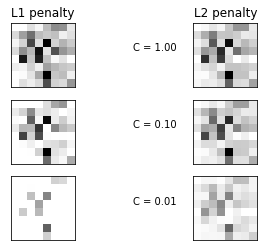

In [5]:
# Set regularization parameter
for i, C in enumerate((1, 0.1, 0.01)):
    # turn down tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, penalty='l1', tol=0.01, solver='saga')
    clf_l2_LR = LogisticRegression(C=C, penalty='l2', tol=0.01, solver='saga')
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100

    print("C=%.2f" % C)
    print("Sparsity with L1 penalty: %.2f%%" % sparsity_l1_LR)
    print("score with L1 penalty: %.4f" % clf_l1_LR.score(X, y))
    print("Sparsity with L2 penalty: %.2f%%" % sparsity_l2_LR)
    print("score with L2 penalty: %.4f" % clf_l2_LR.score(X, y))

    l1_plot = plt.subplot(3, 2, 2 * i + 1)
    l2_plot = plt.subplot(3, 2, 2 * (i + 1))
    if i == 0:
        l1_plot.set_title("L1 penalty")
        l2_plot.set_title("L2 penalty")

    l1_plot.imshow(np.abs(coef_l1_LR.reshape(8, 8)), interpolation='nearest',
                   cmap='binary', vmax=1, vmin=0)
    l2_plot.imshow(np.abs(coef_l2_LR.reshape(8, 8)), interpolation='nearest',
                   cmap='binary', vmax=1, vmin=0)
    plt.text(-8, 3, "C = %.2f" % C)

    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())

plt.show()